In [1]:
# importera bibliotek
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# skapa dataframes och läs in väder- och försäljningsdata
df_sales = pd.read_csv('SumUp-SalesReport_7.7.2023-13.8.2023.csv')
df_weather = pd.read_csv('FMI-WeatherData_7.7.2023-13.8.2023.csv')

In [3]:
# formatera datum och tid
df_sales['Date'] = pd.to_datetime(df_sales['Date']) # formatera datum (försäljning)
df_weather['Date'] = pd.to_datetime(df_weather[['Year', 'Month', 'Day']]) # skapa ny kolumn för formaterat datum (väder)
df_weather['Time'] = pd.to_datetime(df_weather['Time [Local time]'], format='%H:%M').dt.time # skapa ny kolumn för formaterad tid (väder)

In [4]:
# skapa filtrerad vädertabell för ungefärliga öppetthållningstider (11:00-20:00)
filtered_weather = df_weather[(df_weather['Time'] >= pd.to_datetime('11:00').time()) & 
                              (df_weather['Time'] <= pd.to_datetime('20:00').time())]

In [5]:
# skapa pivottabell för dagligt väder 
daily_weather_pivot = filtered_weather.groupby('Date').agg({
    'Air temperature [°C]': 'mean', # medeltemperatur per dag
    'Weather description': lambda x: x.mode()[0] # vanligaste/mest förekommande väderbeskrivningen per dag
}).reset_index()

In [6]:
# kombinera försäljning med dagligt väder enligt datum
merged_data = pd.merge(df_sales, daily_weather_pivot, on='Date', how='left')

In [7]:
# gruppera enligt väder- och produktbeskrivningar och summera sålda produkters totala antal
product_sales_weather = merged_data.groupby(['Weather description', 'Description'])['Quantity'].sum().reset_index()

In [8]:
# sortera enligt mest sålda produkter i olika väderförhållanden
product_sales_weather = product_sales_weather.sort_values(['Weather description', 'Quantity'], ascending=[True, False])

In [9]:
# skapa lista över topprodukter
# 1. topp 10 under normalt/inget nämnvärt väder
top_10_products_normal = product_sales_weather[product_sales_weather['Weather description'] == 'No significant weather'].head(10)
# 2. topp 5 mest sålda produkter under lätta regnskurar
top_5_products_light_rain = product_sales_weather[product_sales_weather['Weather description'] == 'Rain showers, light'].head(5)

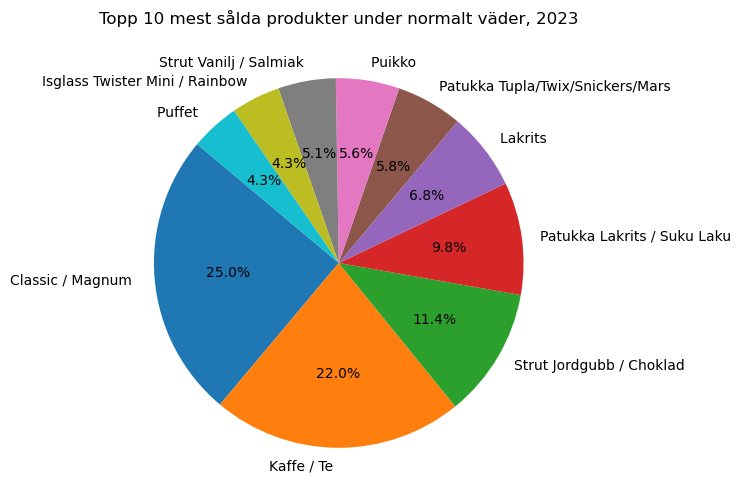

In [10]:
# visualisera försäljningen av topprodukterna under normalt väder
plt.figure(figsize=(6, 6))
plt.pie(top_10_products_normal['Quantity'], labels=top_10_products_normal['Description'], autopct='%1.1f%%', startangle=140)
plt.title('Topp 10 mest sålda produkter under normalt väder, 2023')
plt.show()

In [11]:
# namnge tabell, index och kolumner och printa ut lista över topprodukterna under normalt väder
top_10_products_normal.index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
top_10_products_normal.rename(columns={'Weather description': 'Väderbeskrivning', 
                                       'Description': 'Produkt', 
                                       'Quantity': 'Antal sålda'}, inplace=True)
top_10_products_normal.style.format({'Antal sålda': "{:.0f}"}).set_caption('Topp 10 mest sålda produkter under normalt väder, 2023')

,Väderbeskrivning,Produkt,Antal sålda
1,No significant weather,Classic / Magnum,99
2,No significant weather,Kaffe / Te,87
3,No significant weather,Strut Jordgubb / Choklad,45
4,No significant weather,Patukka Lakrits / Suku Laku,39
5,No significant weather,Lakrits,27
6,No significant weather,Patukka Tupla/Twix/Snickers/Mars,23
7,No significant weather,Puikko,22
8,No significant weather,Strut Vanilj / Salmiak,20
9,No significant weather,Isglass Twister Mini / Rainbow,17
10,No significant weather,Puffet,17


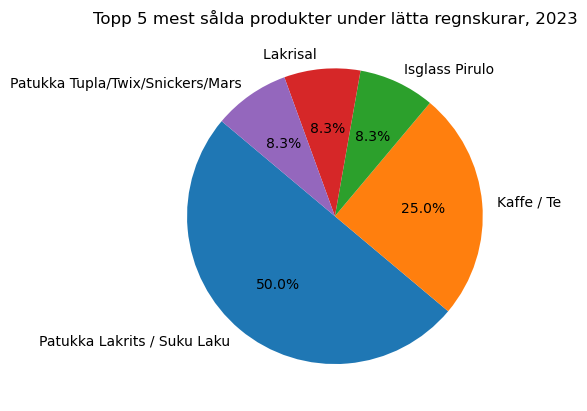

In [12]:
# visualisera försäljningen av topprodukterna under lätta regnskurar
plt.figure()
plt.pie(top_5_products_light_rain['Quantity'], labels=top_5_products_light_rain['Description'], autopct='%1.1f%%', startangle=140)
plt.title('Topp 5 mest sålda produkter under lätta regnskurar, 2023')
plt.show()

In [13]:
# namnge tabell, index och kolumner och printa ut lista över topprodukterna under lätta regnskurar
top_5_products_light_rain.index = ['1', '2', '3', '4', '5']
top_5_products_light_rain.rename(columns={'Weather description': 'Väderbeskrivning', 
                                       'Description': 'Produkt', 
                                       'Quantity': 'Antal sålda'}, inplace=True)
top_5_products_light_rain.style.format({'Antal sålda': "{:.0f}"}).set_caption('Topp 5 mest sålda produkter under normalt väder, 2023')

,Väderbeskrivning,Produkt,Antal sålda
1,"Rain showers, light",Patukka Lakrits / Suku Laku,6
2,"Rain showers, light",Kaffe / Te,3
3,"Rain showers, light",Isglass Pirulo,1
4,"Rain showers, light",Lakrisal,1
5,"Rain showers, light",Patukka Tupla/Twix/Snickers/Mars,1
